In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import (
    ColumnTransformer,
    TransformedTargetRegressor,
    make_column_transformer,
)
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
#! pip install textblob
from textblob import TextBlob

%matplotlib inline

In [25]:
import os

%matplotlib inline
import string
import sys
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append("code/.")

#from plotting_functions import *
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
#from utils import *

In [6]:
survey_df = pd.read_csv('EndOfCourseSurvey.csv')
survey_df

/Users/qichao/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,FactId,DateCompleted,Question_1,Response_Q1,Question_2,Response_Q2,Question_3,Response_Q3,Question_4,Response_Q4,...,Response_Q5,CustomerID,CourseName,Instructor,Program,Requirement,Level,VideoLenght,Price,SurveyType
0,142055,2021-07-07 12:28:00.0000000,How likely is it that you would recommend this...,9,This course covered the topics and content tha...,Agree,"The course materials were engaging, clear, and...",Agree,The instructor was effective in delivering the...,Agree,...,Did Not Respond,198151,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey
1,142056,2021-08-12 14:42:00.0000000,How likely is it that you would recommend this...,9,This course covered the topics and content tha...,Agree,"The course materials were engaging, clear, and...",Agree,The instructor was effective in delivering the...,Agree,...,Did Not Respond,152550,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey
2,142057,2021-08-18 03:46:00.0000000,How likely is it that you would recommend this...,10,This course covered the topics and content tha...,Strongly Agree,"The course materials were engaging, clear, and...",Strongly Agree,The instructor was effective in delivering the...,Strongly Agree,...,Did Not Respond,191851,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey
3,142058,2021-08-22 16:34:00.0000000,How likely is it that you would recommend this...,10,This course covered the topics and content tha...,Strongly Agree,"The course materials were engaging, clear, and...",Strongly Agree,The instructor was effective in delivering the...,Strongly Agree,...,Did Not Respond,263617,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey
4,142059,2021-08-25 01:48:00.0000000,How likely is it that you would recommend this...,10,This course covered the topics and content tha...,Strongly Agree,"The course materials were engaging, clear, and...",Strongly Agree,The instructor was effective in delivering the...,Strongly Agree,...,Did Not Respond,305095,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619117,142050,2021-07-13 02:49:00.0000000,How likely is it that you would recommend this...,10,This course covered the topics and content tha...,Strongly Agree,"The course materials were engaging, clear, and...",Strongly Agree,The instructor was effective in delivering the...,Strongly Agree,...,NaN,75513,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey
619118,142051,2021-08-09 01:58:00.0000000,How likely is it that you would recommend this...,10,This course covered the topics and content tha...,Strongly Agree,"The course materials were engaging, clear, and...",Strongly Agree,The instructor was effective in delivering the...,Strongly Agree,...,Did Not Respond,134180,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey
619119,142052,2021-09-17 01:13:00.0000000,How likely is it that you would recommend this...,8,This course covered the topics and content tha...,Agree,"The course materials were engaging, clear, and...",Agree,The instructor was effective in delivering the...,Agree,...,Did Not Respond,171726,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey
619120,142053,2021-07-14 14:04:00.0000000,How likely is it that you would recommend this...,10,This course covered the topics and content tha...,Strongly Agree,"The course materials were engaging, clear, and...",Strongly Agree,The instructor was effective in delivering the...,Strongly Agree,...,Ø²,192369,Building a 3 Statement Financial Model,Tim Vipond,FMVA,Core,3,2-3 hrs,197.0,NewSurvey


## Clean Data

In [71]:
survey_df['Level'].unique()

array([3, 4, 5, 1, 2, '2', '1', '4', '3', 'Archive', nan, '5'],
      dtype=object)

In [72]:
survey_df = survey_df[survey_df['Level'] != 'Archive'].dropna()
survey_df['Level'] = survey_df['Level'].apply(np.int64)
survey_df['Level'].unique()

array([3, 4, 5, 1, 2])

In [101]:
survey_df = survey_df[survey_df['Response_Q2'] != 'Did Not Respond'].dropna()
survey_df["Response_Q2"].unique()

array(['Agree', 'Strongly Agree', 'Neutral', 'Disagree',
       'Strongly Disagree'], dtype=object)

In [102]:
survey_df = survey_df[survey_df['Response_Q3'] != 'Did Not Respond'].dropna()
survey_df["Response_Q3"].unique()

array(['Agree', 'Strongly Agree', 'Neutral', 'Disagree',
       'Strongly Disagree'], dtype=object)

In [103]:
survey_df = survey_df[survey_df['Response_Q4'] != 'Did Not Respond'].dropna()
survey_df["Response_Q4"].unique()

array(['Agree', 'Strongly Agree', 'Neutral', 'Disagree',
       'Strongly Disagree'], dtype=object)

In [104]:
survey_df["CustomerID"].unique()

array([198151, 152550, 191851, ..., 173145, 238281, 202949])

In [105]:
survey_df["Price"].unique()

array([197., 147.,  97.,   0.,  99.])

In [172]:
survey_df["Program"].unique()

array(['FMVA', 'CBCA', 'BIDA', 'CMSA', 'CRE', 'ESG', 'BIDA, FMVA',
       'Cryptocurrency', 'FPWMA', 'ML', 'ALL PROGRAMS'], dtype=object)

In [107]:
survey_df["Requirement"].unique()

array(['Core', 'Elective', 'Prep', 'Case Study'], dtype=object)

In [122]:
survey_df = survey_df[survey_df['VideoLenght'] != 'Archive'].dropna()
survey_df['VideoLenght'].unique()

array(['2-3 hrs', 'Over 3 hrs', 'Under 1 hr', '1-2 hrs'], dtype=object)

In [123]:
survey_df_clean = survey_df[["Response_Q1", "Response_Q2", "Response_Q3", "Response_Q4", "CustomerID", "Program", "Requirement", "Level", "VideoLenght", "Price"]]

In [356]:
Customer_df = survey_df_clean.groupby("CustomerID").mean()
Customer_df

,Response_Q1,Level,Price
CustomerID,,,
69810,8.000000,2.000000,0.000000
69811,9.666667,1.666667,0.000000
69812,10.000000,2.000000,0.000000
69813,10.000000,2.000000,0.000000
69814,5.500000,2.000000,0.000000
...,...,...,...
307032,7.500000,2.000000,0.000000
307033,9.727273,2.545455,88.727273
307034,10.000000,2.083333,40.666667


<AxesSubplot:ylabel='Frequency'>

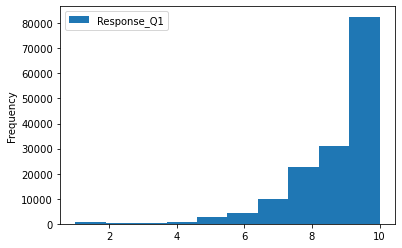

In [248]:
# average response distribution of all customers
Customer_df = survey_df_clean.groupby("CustomerID").mean().sort_values(by = 'Response_Q1')[["Response_Q1"]]
Customer_df.plot.hist(bins=10)


<AxesSubplot:ylabel='Frequency'>

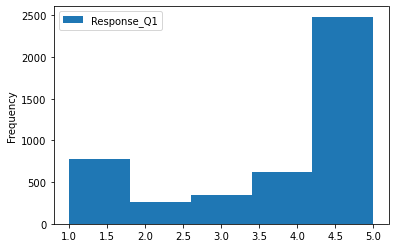

In [252]:
# average response distribution of customers
Customer_df[Customer_df["Response_Q1"] <= 5].plot.hist(bins=5)

In [357]:
Customer_df[Customer_df["Response_Q1"] <= 5]

,Response_Q1,Level,Price
CustomerID,,,
69948,5.00,2.25,24.25
69982,1.00,2.00,0.00
69990,1.00,1.00,0.00
70032,1.00,1.00,0.00
70044,4.00,2.00,0.00
...,...,...,...
306712,4.00,2.00,0.00
306769,5.00,2.00,0.00
306897,4.75,2.75,134.50


/var/folders/3z/vln54yld7pl4fbx7dy7pfg580000gp/T/ipykernel_76983/424816136.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Customer_df[survey_df_clean.groupby("CustomerID").count().sort_values(by = 'Response_Q1')['Response_Q1'] > 5].plot.hist(bins=10)


<AxesSubplot:ylabel='Frequency'>

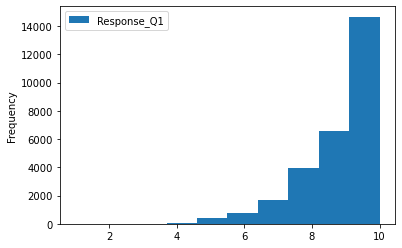

In [253]:
# average response distribution of customers who have taken more than 4 courses
Customer_df[survey_df_clean.groupby("CustomerID").count().sort_values(by = 'Response_Q1')['Response_Q1'] > 5].plot.hist(bins=10)

/var/folders/3z/vln54yld7pl4fbx7dy7pfg580000gp/T/ipykernel_76983/75418871.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Customer_df[Customer_df["Response_Q1"] <= 5][survey_df_clean.groupby("CustomerID").count().sort_values(by = 'Response_Q1')['Response_Q1'] > 5].plot.hist(bins=10)


<AxesSubplot:ylabel='Frequency'>

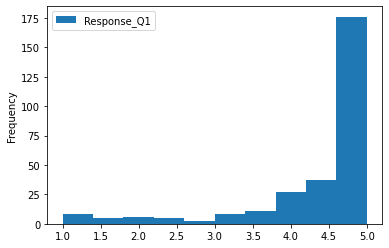

In [256]:
# average response distribution of customers who have taken more than 4 courses
Customer_df[Customer_df["Response_Q1"] <= 5][survey_df_clean.groupby("CustomerID").count().sort_values(by = 'Response_Q1')['Response_Q1'] > 5].plot.hist(bins=10)

## Train/Test Split 

In [125]:
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)

train_df, test_df = train_test_split(survey_df_clean, test_size=0.10, random_state=123)
train_df.head()

,Response_Q1,Response_Q2,Response_Q3,Response_Q4,CustomerID,Program,Requirement,Level,VideoLenght,Price
222919,1,Strongly Disagree,Strongly Disagree,Strongly Disagree,268592,CMSA,Elective,4,Over 3 hrs,147.0
92686,8,Neutral,Agree,Agree,101246,FMVA,Prep,2,1-2 hrs,0.0
363329,10,Strongly Agree,Strongly Agree,Strongly Agree,122642,FMVA,Elective,2,2-3 hrs,97.0
401825,10,Strongly Agree,Strongly Agree,Strongly Agree,172724,FMVA,Prep,2,Under 1 hr,0.0
297372,8,Neutral,Agree,Agree,186949,ESG,Core,1,Under 1 hr,0.0


## Let's separate `X` and `y`

In [126]:
train_df.shape

(545100, 10)

In [127]:
X_train = train_df.drop(columns=["Response_Q1"])
y_train = train_df["Response_Q1"]

X_test = test_df.drop(columns=["Response_Q1"])
y_test = test_df["Response_Q1"]

## EDA

In [128]:
train_df.describe()

,Response_Q1,CustomerID,Level,Price
count,545100.000000,545100.000000,545100.000000,545100.000000
mean,8.904641,188468.585766,2.291411,64.497004
std,1.535084,68461.700074,0.818367,72.513035
min,1.000000,69810.000000,1.000000,0.000000
25%,8.000000,129349.000000,2.000000,0.000000
50%,10.000000,188690.000000,2.000000,0.000000
75%,10.000000,247709.000000,3.000000,97.000000
max,10.000000,307036.000000,5.000000,197.000000


In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545100 entries, 222919 to 280955
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Response_Q1  545100 non-null  int64  
 1   Response_Q2  545100 non-null  object 
 2   Response_Q3  545100 non-null  object 
 3   Response_Q4  545100 non-null  object 
 4   CustomerID   545100 non-null  int64  
 5   Program      545100 non-null  object 
 6   Requirement  545100 non-null  object 
 7   Level        545100 non-null  int64  
 8   VideoLenght  545100 non-null  object 
 9   Price        545100 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 45.7+ MB


## Feature Types

In [140]:
drop_features = ["CustomerID"]
#numeric_features = [
#    "Level",
#    "Price"
#]
ordinal_features_reg = [
    "Response_Q2",
    "Response_Q3",
    "Response_Q4"
]
ordering = [
    'Strongly Agree', 
    'Agree', 
    'Neutral', 
    'Disagree',
    'Strongly Disagree'
]

categorical_features = [
    "Program",
    "Requirement"
    
]

ordering_ordinal_reg = [ordering] * len(ordinal_features_reg)
ordering_ordinal_reg

[['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'],
 ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'],
 ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']]

We'll pass the above as categories in our OrdinalEncoder

- There are a bunch more ordinal features using different scales.
  - These we'll be calling `ordinal_features_oth`. 
  - We are encoding them separately. 

In [135]:
ordinal_features_oth = [
    "Level",
    "VideoLenght",
    "Price"
]

ordering_ordinal_oth = [
    [1, 2, 3, 4, 5],
    ['Under 1 hr', '1-2 hrs', '2-3 hrs', 'Over 3 hrs'],
    [0., 97., 99., 147., 197.],
]

## Applying feature transformations

- Since we have mixed feature types, let's use `ColumnTransformer` to apply different transformations on different features types.  

In [141]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
# numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
ordinal_transformer_reg = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=ordering_ordinal_reg),
)

ordinal_transformer_oth = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=ordering_ordinal_oth),
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

preprocessor = make_column_transformer(
    ("drop", drop_features),
    #(numeric_transformer, numeric_features),
    (ordinal_transformer_reg, ordinal_features_reg),
    (ordinal_transformer_oth, ordinal_features_oth),
    (categorical_transformer, categorical_features),
)

## Examining the preprocessed data

In [142]:
preprocessor.fit(X_train)  # Calling fit to examine all the transformers.
preprocessor.named_transformers_

{'drop': 'drop',
 'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Strongly Agree', 'Agree',
                                              'Neutral', 'Disagree',
                                              'Strongly Disagree'],
                                             ['Strongly Agree', 'Agree',
                                              'Neutral', 'Disagree',
                                              'Strongly Disagree'],
                                             ['Strongly Agree', 'Agree',
                                              'Neutral', 'Disagree',
                                              'Strongly Disagree']]))]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[[1, 2, 3, 4, 5],
                                

In [146]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names(categorical_features)
)
new_columns = (
    ordinal_features_reg + ordinal_features_oth + ohe_columns
)

In [147]:
new_columns

['Response_Q2',
 'Response_Q3',
 'Response_Q4',
 'Level',
 'VideoLenght',
 'Price',
 'Program_ALL PROGRAMS',
 'Program_BIDA',
 'Program_BIDA, FMVA',
 'Program_CBCA',
 'Program_CMSA',
 'Program_CRE',
 'Program_Cryptocurrency',
 'Program_ESG',
 'Program_FMVA',
 'Program_FPWMA',
 'Program_ML',
 'Requirement_Case Study',
 'Requirement_Core',
 'Requirement_Elective',
 'Requirement_Prep']

In [148]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head()

,Response_Q2,Response_Q3,Response_Q4,Level,VideoLenght,Price,Program_ALL PROGRAMS,Program_BIDA,"Program_BIDA, FMVA",Program_CBCA,...,Program_CRE,Program_Cryptocurrency,Program_ESG,Program_FMVA,Program_FPWMA,Program_ML,Requirement_Case Study,Requirement_Core,Requirement_Elective,Requirement_Prep
222919,4.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92686,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
363329,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
401825,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
297372,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [150]:
X_train_enc.shape

(545100, 21)

## Model building 

### `DummyRegressor`

In [153]:
dummy = DummyRegressor()
pd.DataFrame(cross_validate(dummy, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.241748,0.007085,-1.030719e-05,0.0
1,0.086172,0.002292,-1.589615e-09,0.0
2,0.024373,0.003855,-3.997249e-06,0.0
3,0.023990,0.001145,-5.357532e-06,0.0
4,0.019756,0.000399,-7.710638e-07,0.0
5,0.055854,0.000410,-2.983805e-08,0.0
6,0.019461,0.000387,-7.705265e-08,0.0
7,0.020235,0.000460,-6.141694e-06,0.0
8,0.020253,0.000399,-3.465473e-05,0.0
9,0.019398,0.000387,-1.948738e-05,0.0


### linear model: `Ridge`

In [154]:
lr = make_pipeline(preprocessor, Ridge())
lr.fit(X_train, y_train);

In [155]:
lr_preds = lr.predict(X_test)
lr_preds[:10]

array([ 9.98645889,  9.90589103,  9.99470247,  9.91754027,  9.99470247,
        9.86696121,  6.47348003,  8.22584767, 10.10430823,  8.14527981])

In [156]:
lr_preds.max(), lr_preds.min()

(10.189552442919974, 2.6580962428754393)

In [157]:
print("Smallest coefficient: ", lr.named_steps["ridge"].coef_.min())
print("Largest coefficient:", lr.named_steps["ridge"].coef_.max())

Smallest coefficient:  -0.8183088266121012
Largest coefficient: 0.23146205918514998


In [158]:
lr_pipe = make_pipeline(preprocessor, Ridge())
pd.DataFrame(cross_validate(lr_pipe, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,1.643657,0.103001,0.523283,0.523397
1,1.404169,0.089758,0.526797,0.523006
2,1.244199,0.107367,0.520721,0.523679
3,1.250920,0.085882,0.524960,0.523211
4,1.150871,0.086969,0.522890,0.523440
5,1.117419,0.084705,0.523764,0.523343
6,1.243207,0.085785,0.521355,0.523613
7,1.172441,0.088617,0.516169,0.524181
8,1.224478,0.090016,0.527742,0.522891
9,1.268668,0.086690,0.525657,0.523133


#### Tuning `alpha` hyperparameter of `Ridge`
- Recall that `Ridge` has a hyperparameter `alpha` that controls the fundamental tradeoff.
- This is like `C` in `LogisticRegression` but, annoyingly, `alpha` is the inverse of `C`.
- That is, large `C` is like small `alpha` and vice versa.
- Smaller `alpha`: lower training error (overfitting)

In [160]:
param_grid = {"ridge__alpha": 10.0 ** np.arange(-6, 6, 1)}

pipe_ridge = make_pipeline(preprocessor, Ridge())

search = GridSearchCV(pipe_ridge, param_grid, return_train_score=True, n_jobs=-1)
search.fit(X_train, y_train)
train_scores = search.cv_results_["mean_train_score"]
cv_scores = search.cv_results_["mean_test_score"]

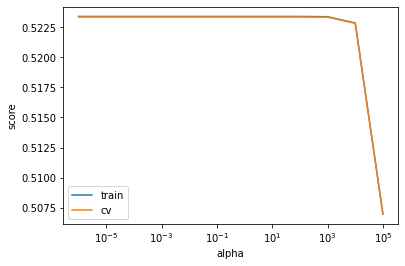

In [161]:
plt.semilogx(param_grid["ridge__alpha"], train_scores.tolist(), label="train")
plt.semilogx(param_grid["ridge__alpha"], cv_scores.tolist(), label="cv")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("score");

In [164]:
best_alpha = search.best_params_
best_alpha

{'ridge__alpha': 100.0}

In [162]:
search.best_score_

0.5233469683047616

In [173]:
pipe_bigalpha = make_pipeline(preprocessor, Ridge(alpha=100))
pipe_bigalpha.fit(X_train, y_train)
bigalpha_coeffs = pipe_bigalpha.named_steps["ridge"].coef_
pd.DataFrame(
    data=abs(bigalpha_coeffs), index=new_columns, columns=["Coefficients"]
).sort_values(by="Coefficients", ascending=False)

,Coefficients
Response_Q2,0.817893
Response_Q3,0.520854
Response_Q4,0.421592
Program_ESG,0.227761
Program_ALL PROGRAMS,0.174158
Program_Cryptocurrency,0.126559
Program_ML,0.095000
Requirement_Prep,0.089563
Program_FPWMA,0.066501
Requirement_Elective,0.050973


### Random Forest

In [185]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


In [192]:
scoring_metrics = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "r2": "r2",
    "accuracy": "accuracy",
}

In [193]:
results = {}

In [194]:
dummy = DummyClassifier(strategy="stratified")
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metrics
)

In [195]:
pd.DataFrame(results).T

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2,test_accuracy,train_accuracy
Dummy,0.060 (+/- 0.025),0.038 (+/- 0.004),-4.731 (+/- 0.024),-4.714 (+/- 0.005),-1.008 (+/- 0.010),-1.000 (+/- 0.002),0.327 (+/- 0.001),0.327 (+/- 0.000)


In [197]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1)
)
results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metrics
)
pd.DataFrame(results).T

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2,test_accuracy,train_accuracy
Dummy,0.060 (+/- 0.025),0.038 (+/- 0.004),-4.731 (+/- 0.024),-4.714 (+/- 0.005),-1.008 (+/- 0.010),-1.000 (+/- 0.002),0.327 (+/- 0.001),0.327 (+/- 0.000)
Random forests,12.454 (+/- 2.526),0.790 (+/- 0.134),-1.363 (+/- 0.006),-1.304 (+/- 0.004),0.422 (+/- 0.002),0.447 (+/- 0.002),0.600 (+/- 0.001),0.609 (+/- 0.000)


#### Example

In [200]:
pipe_rf_demo = make_pipeline(
    preprocessor, RandomForestClassifier(max_depth=2, n_estimators=3, random_state=123)
)
pipe_rf_demo.fit(X_train, y_train);

In [215]:
ohe_names = list(pipe_rf_demo.named_steps["columntransformer"].named_transformers_["pipeline-3"].named_steps["onehotencoder"].get_feature_names_out())

In [214]:
feature_names = ordinal_features_reg + ordinal_features_oth + ohe_names
feature_names

['Response_Q2',
 'Response_Q3',
 'Response_Q4',
 'Level',
 'VideoLenght',
 'Price',
 'x0_ALL PROGRAMS',
 'x0_BIDA',
 'x0_BIDA, FMVA',
 'x0_CBCA',
 'x0_CMSA',
 'x0_CRE',
 'x0_Cryptocurrency',
 'x0_ESG',
 'x0_FMVA',
 'x0_FPWMA',
 'x0_ML',
 'x1_Case Study',
 'x1_Core',
 'x1_Elective',
 'x1_Prep']

In [216]:
test_example = X_test.sample(1)
print("Classes: ", pipe_rf_demo.classes_)
print("Prediction by random forest: ", pipe_rf_demo.predict(test_example))
transformed_example = preprocessor.transform(test_example)
pd.DataFrame(data = transformed_example.flatten(), index=feature_names)

Classes:  [ 1  2  3  4  5  6  7  8  9 10]
Prediction by random forest:  [8]


,0
Response_Q2,1.0
Response_Q3,1.0
Response_Q4,1.0
Level,1.0
VideoLenght,2.0
Price,1.0
x0_ALL PROGRAMS,0.0
x0_BIDA,0.0
"x0_BIDA, FMVA",0.0
x0_CBCA,0.0


## WordCloud for Courses

### Text Polarity

In [564]:
#survey_df

In [7]:
def sent_polarity(text):
    '''Calculate the sentiment polarity of a text'''
    return TextBlob(str(text)).polarity

survey_df['comment_polarity'] = survey_df['Response_Q5'].apply(sent_polarity)

In [8]:
from collections import defaultdict
neg_comment = defaultdict(list)
pos_comment = defaultdict(list)

In [9]:
neg_survey_df =  survey_df[survey_df["comment_polarity"] < 0]

for i in range(neg_survey_df.shape[0]):
    CourseName = neg_survey_df.iloc[i]["CourseName"]
    comment = neg_survey_df.iloc[i]["Response_Q5"]
    neg_comment[CourseName].append(comment)
    

In [10]:
len(neg_comment.keys())
# 132 - 118 = 14 courses don't have negative comments

123

In [11]:
pos_survey_df =  survey_df[survey_df["comment_polarity"] > 0]

for i in range(pos_survey_df.shape[0]):
    CourseName = pos_survey_df.iloc[i]["CourseName"]
    comment = pos_survey_df.iloc[i]["Response_Q5"]
    pos_comment[CourseName].append(comment)
    

In [12]:
#pos_comment

In [13]:
len(pos_comment.keys())
# 132 - 119 = 13 courses don't have positive comments

125

In [14]:
set(neg_comment.keys()) - set(pos_comment.keys())
# only have negative comment

{'Advanced Futures & Forwards'}

In [15]:
set(pos_comment.keys()) - set(neg_comment.keys())
# only have positive comment

{'Applied Technical Analysis for Equity Markets',
 'Case Study - RockCrusher Rentals',
 'Financial Modeling using VBA'}

In [16]:
pos_comment['Case Study - RockCrusher Rentals']

['Satisfied',
 'It would be great if you show US how to estimate expenses when calcuating RAROC ',
 'all good',
 'good course',
 'More practical exercises.',
 'Thanks',
 'Overall good']

### extract nouns and adjectives

In [18]:
import nltk
sentences = []
for comment in pos_comment['Case Study - RockCrusher Rentals']:
    sentences.extend(nltk.sent_tokenize(comment)) 
n_adj = '' # str to hold all nouns and adjectives

for sentence in sentences:
     for word, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
        if pos.startswith('NN') or pos.startswith('JJ'):
            n_adj += word
            n_adj += ' '


In [19]:
n_adj

'Satisfied great expenses RAROC good good course practical exercises Thanks Overall good '

### Generate word could

In [20]:
#from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'\w+')

In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["course", "courses", "topic", "section", "good", "great", 
                  "goodgood", "file", "content", "thank", "work", "learning", "VBA", 
                  "follow", "bit", "lot", "make", "use", "without", "think",
                 "little", "learn", "feel", "first", "excel", "need", "much",
                 "working", "provided", "thanks", "finance", "better", "excellent",
                 "instructor", "model", "formula", "question", "questions", "example"])

In [50]:


def word_cloud(CourseName):
    '''generate the positive and negative word cloud for a course'''
    

    print ("Negative Comments: {}".format(len(neg_comment[CourseName])))
    if len(neg_comment[CourseName]) != 0:
        sentences = []
        for comment in neg_comment[CourseName]:
            sentences.extend(nltk.sent_tokenize(comment)) 
        n_adj = '' # str to hold all nouns and adjectives
        for sentence in sentences:
             for word, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
                if pos.startswith('NN') or pos.startswith('JJ'):
                    n_adj += word
                    n_adj += ' '
        wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50, background_color="black").generate(n_adj)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
            
    #text = tokenizer.tokenize(pos_comment[CourseName])
    print ("Positive Comments: {}".format(len(pos_comment[CourseName])))
    if len(pos_comment[CourseName]) != 0:
        sentences = []
        for comment in pos_comment[CourseName]:
            sentences.extend(nltk.sent_tokenize(comment)) 
        n_adj = '' # str to hold all nouns and adjectives
        for sentence in sentences:
             for word, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
                if pos.startswith('NN') or pos.startswith('JJ'):
                    n_adj += word
                    n_adj += ' '
        wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=50, background_color="white").generate(n_adj)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

Negative Comments: 294


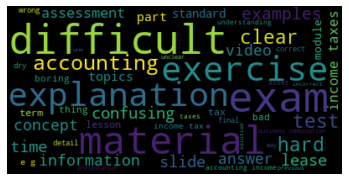

Positive Comments: 1082


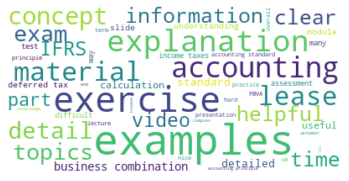

In [51]:

word_cloud("Accounting Principles and Standards")

Negative Comments: 3


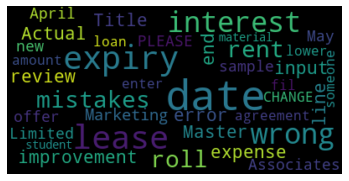

Positive Comments: 9


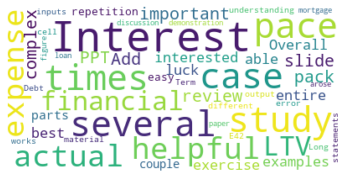

In [53]:
#High NPS(9.15)
word_cloud('Rocky Mountain Holdings Limited Case Study')

Course: Applied Technical Analysis for Equity Markets 
Negative Comments: 0
Course: Applied Technical Analysis for Equity Markets 
Positive Comments: 1


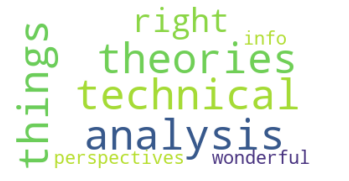

In [30]:
# 'Applied Technical Analysis for Equity Markets' only have positive comment
word_cloud('Applied Technical Analysis for Equity Markets')

Course: Case Study - RockCrusher Rentals 
Negative Comments: 0
Course: Case Study - RockCrusher Rentals 
Positive Comments: 7


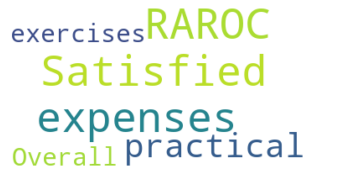

In [31]:
# 'Case Study - RockCrusher Rentals' only have positive comment
word_cloud('Case Study - RockCrusher Rentals')